In [1]:
import numpy as np

In [3]:
arr = np.arange(10)
np.save('some_array', arr)

In [4]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
np.savez('array_archive.npz', a = arr, b = arr)

In [7]:
arch = np.load('array_archive.npz')

In [8]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
np.savez_compressed('arrays_compressed.npz', a = arr, b = arr)

In [11]:
# Linear Algebra

x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [9, 9]])

In [12]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [13]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 9.,  9.]])

In [14]:
x.dot(y)

array([[ 31.,  64.],
       [ 73., 181.]])

In [15]:
np.dot(x, y)

array([[ 31.,  64.],
       [ 73., 181.]])

In [16]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [17]:
x @ np.ones(3)

array([ 6., 15.])

In [18]:
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)

mat = X.T.dot(X)

inv(mat)

array([[ 2.96346056,  0.45042065, -0.10192864, -0.09150525,  5.92602159],
       [ 0.45042065,  0.27399803, -0.05170784,  0.12810579, -0.60105447],
       [-0.10192864, -0.05170784,  0.43420631, -0.1213116 ,  0.34455374],
       [-0.09150525,  0.12810579, -0.1213116 ,  0.35487676, -1.34913899],
       [ 5.92602159, -0.60105447,  0.34455374, -1.34913899, 33.73808642]])

In [19]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -1.24577238e-16,  5.45296452e-18,
        -5.27106853e-18, -2.92542636e-15],
       [-1.34697057e-16,  1.00000000e+00, -1.62442170e-18,
        -2.86797654e-17,  5.02160721e-15],
       [ 6.25705315e-17, -1.34494566e-17,  1.00000000e+00,
        -6.65890019e-17, -1.00137133e-15],
       [-6.39855569e-17,  1.16406123e-17,  7.73907197e-19,
         1.00000000e+00, -1.64499763e-15],
       [ 3.87717379e-17,  4.34614497e-17, -1.20526071e-18,
         2.33674160e-17,  1.00000000e+00]])

In [20]:
q, r = qr(mat)

In [21]:
r

array([[-3.51174849, 11.93266083, -1.10895407, -3.30626543,  0.7109536 ],
       [ 0.        , -2.09489156, -0.25457907,  2.04182541,  0.05148128],
       [ 0.        ,  0.        , -2.67290413, -2.13131943, -0.05874415],
       [ 0.        ,  0.        ,  0.        , -2.73175328, -0.10841076],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.02916461]])

In [22]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 8.33204364e-01,  9.35438322e-01,  4.32615822e-01,
        -1.55858131e+00],
       [ 9.31763305e-02,  1.66346330e-01,  8.81374404e-01,
        -1.07122051e+00],
       [ 1.34039250e+00, -3.82642852e-01,  9.98022378e-01,
         2.40293616e-01],
       [ 6.57753867e-04,  7.82029901e-01, -8.99820929e-02,
        -9.04187972e-01]])

In [23]:
# comparación

from random import normalvariate

N = 1000000

%timeit samples = [normalvariate(0,1) for _ in range(N)]

1.07 s ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%timeit np.random.normal(size=N)

38.5 ms ± 90.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
np.random.seed(1234)

In [27]:
rng = np.random.RandomState(1234)

In [28]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

In [29]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [30]:
import matplotlib.pyplot as plt

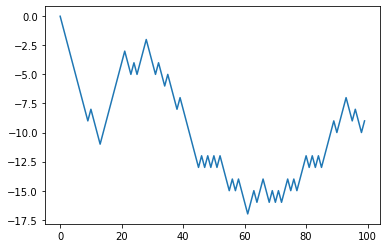

In [31]:
plt.plot(walk[:100])

In [32]:
nsteps = 1000

draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [33]:
walk.min()

-9

In [34]:
walk.max()

60

In [35]:
(np.abs(walk) >= 10).argmax()

297

In [36]:
nwalks = 5000

In [37]:
nsteps = 1000

In [38]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1

In [39]:
steps = np.where(draws > 0, 1, -1)

In [40]:
walks = steps.cumsum(1)

In [41]:
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]], dtype=int32)

In [42]:
walks.max()

122

In [43]:
walks.min()

-128

In [44]:
hits30 = (np.abs(walks) >= 30).any(1)

In [45]:
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [46]:
hits30.sum() # Number that hit 30 or -30

3368

In [47]:
crossing_times = (np.abs(walks[hits30]) >=30).argmax(1)

In [48]:
crossing_times

array([133, 395, 343, ..., 409, 297, 747], dtype=int64)

In [49]:
crossing_times.mean()

509.99762470308787

In [50]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

In [51]:
import pandas as pd
from pandas import Series, DataFrame

In [52]:
obj = pd.Series([4, 7, -5, 3])

obj

0    4
1    7
2   -5
3    3
dtype: int64